<a href="https://colab.research.google.com/github/Donyicoder2006/Project_works/blob/main/Classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANN5**

In [1]:
!pip install keras-tuner
!pip install tensorflow
!pip install keras

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop, SGD, Nadam, Adadelta, Adamax # Import all necessary optimizers
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
data2 = pd.read_excel(r'/content/Resturant_Cleaned_df.xlsx')

In [3]:
data2.columns

Index(['Resturant_id', 'Resturant_Name', 'Cuisine', 'Location', 'City',
       'Ratings'],
      dtype='object')

In [4]:
import numpy as np

conditions_data2 = [
    (data2['Ratings'] >= 2.4) & (data2['Ratings'] < 3.5),
    (data2['Ratings'] >= 3.5) & (data2['Ratings'] < 4.5),
    (data2['Ratings'] >= 4.5) & (data2['Ratings'] <= 4.9)
]

choices_data2 = ['poor feedback', 'median feedback', 'excellent feedback']

data2['Feedback'] = np.select(conditions_data2, choices_data2, default='Other')
data2 = data2.drop('Ratings', axis=1)

In [5]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

In [6]:
encode = OrdinalEncoder()

In [7]:
data2.columns

Index(['Resturant_id', 'Resturant_Name', 'Cuisine', 'Location', 'City',
       'Feedback'],
      dtype='object')

In [8]:
x = data2.drop(['Feedback','Resturant_id'], axis=1)
y = data2['Feedback']

In [9]:
x_encoded = encode.fit_transform(x)
y_encoded = encode.fit_transform(y.values.reshape(-1, 1))

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y_encoded.ravel(), test_size=0.2, random_state=42)

In [11]:
import keras_tuner as kt

In [12]:
def build_model(hp):
    model = Sequential()
    counter = 0
    for i in range(hp.Int('num_layers', min_value=1, max_value=10)):
      if counter == 0:
        model.add(Dense
         (units=hp.Int('units' + str(i), min_value=5, max_value=150, step=5),
         activation=hp.Choice('activation' + str(i), ['relu', 'tanh', 'sigmoid','selu','linear','softmax','leaky relu','softplus','silu','mish']),
         input_dim=x_train.shape[1]
          )
         )
        model.add(Dropout(hp.Choice('dropout' + str(i), values=[0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9])))
        model.add(BatchNormalization())
      else:
        model.add(Dense
         (units=hp.Int('units' + str(i), min_value=8, max_value=150, step=8),
         activation=hp.Choice('activation' + str(i), ['relu', 'tanh', 'sigmoid','selu','linear','softmax','leaky relu','softplus','silu','mish']))
          )
        model.add(Dropout(hp.Choice('dropout' + str(i), values=[0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9])))
        model.add(BatchNormalization())
        counter += 1
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=hp.Choice('optimizer',values = ['RMSprop','Adam','sgd','nadam','adadelta','Adamax']),
                  metrics=['accuracy'])
    return model


In [14]:
tuner = kt.RandomSearch(build_model,
                        objective = 'val_accuracy',
                        max_trials = 6,
                        directory = 'dir1',
                        project_name = 'project1')

Reloading Tuner from dir1/project1/tuner0.json


In [15]:
tuner.search(x_train, y_train, epochs=10, validation_data = (x_test,y_test))

In [16]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 4,
 'units0': 85,
 'activation0': 'softplus',
 'dropout0': 0.6,
 'optimizer': 'Adam',
 'units1': 5,
 'activation1': 'relu',
 'dropout1': 0.1,
 'units2': 5,
 'activation2': 'relu',
 'dropout2': 0.1,
 'units3': 5,
 'activation3': 'relu',
 'dropout3': 0.1}

In [17]:
early_stop = EarlyStopping(monitor='val_loss',
                           patience=3,
                           restore_best_weights=True,
                           verbose = 1,
                           min_delta = 0.0001,
                           mode = 'auto'
                           )

In [18]:
model = tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 38 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [19]:
history = model.fit(x_train, y_train, initial_epoch= 11,epochs=100, batch_size=5, validation_data=(x_test,y_test), callbacks=[early_stop])

Epoch 12/100
2126/2126 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.5772 - loss: 0.8431 - val_accuracy: 0.5849 - val_loss: 0.8518
Epoch 13/100
2126/2126 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.5818 - loss: 0.8389 - val_accuracy: 0.5849 - val_loss: 0.8564
Epoch 14/100
2126/2126 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.5847 - loss: 0.8323 - val_accuracy: 0.5849 - val_loss: 0.8523
Epoch 15/100
2126/2126 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.5864 - loss: 0.8340 - val_accuracy: 0.5849 - val_loss: 0.8526
Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 12.


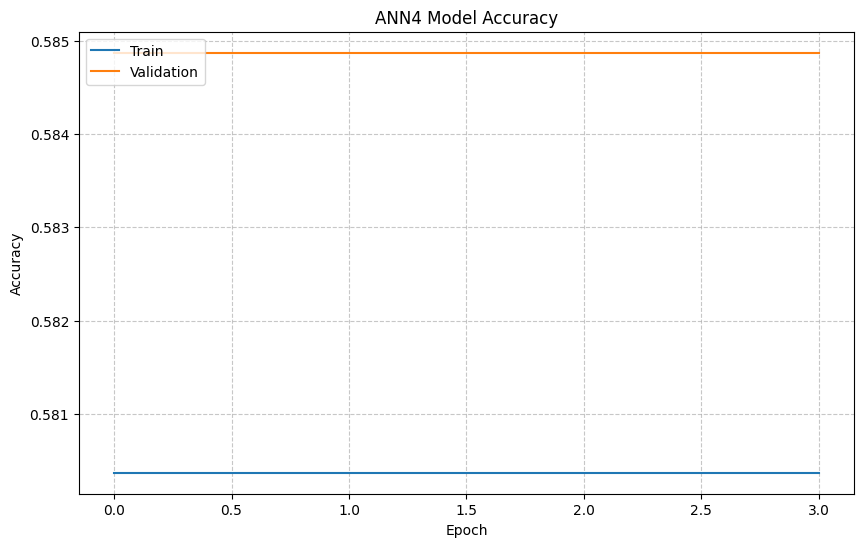

In [20]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('ANN4 Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

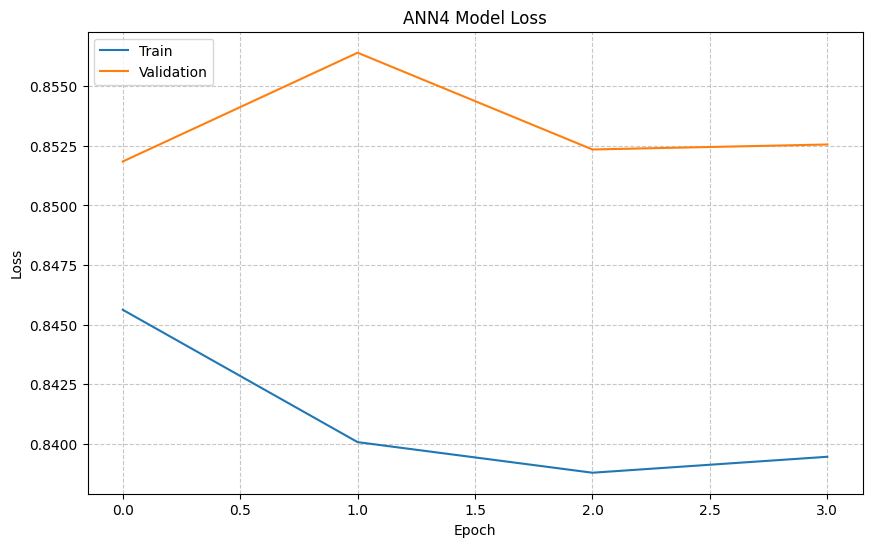

In [21]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('ANN4 Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [ ]:

1